In [4]:
import numpy as np
import torch.utils.data
import pandas as pd
from sklearn import preprocessing
import os
from torch.autograd import Variable
import torch.nn.functional as F  
import argparse
import re
import json
import glob
import sys
import numpy as np
import scipy
import torch
import torch.nn as nn
from itertools import chain
from torch import zeros
from torch.nn.functional import relu
from torch import sigmoid
from torch.utils.data import Dataset, DataLoader
from sklearn import preprocessing
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.spatial import distance

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')


In [5]:

def read_data(filepath):
    df = pd.read_csv(filepath, encoding='gbk')
    df['时间'] = pd.to_datetime(df['时间'])
    df.set_index(['时间'], inplace=True)
    full_perid = pd.date_range(start='20200101', end='20210101',freq='10min', closed='left')
    df = pd.DataFrame(df, index=full_perid)
    return df

def data_clean(df):
    # 当空缺为1时，线性插值
    # 当小于0时置0，对应负功率
    df = df.interpolate(limit=1)
    df[df<0] = 0
    return df


In [5]:
data[:,2].shape

(49883,)

In [11]:
data.shape

(49883, 4)

[[4.9860e+01 4.5000e-01 1.7700e+00 0.0000e+00]
 [4.9860e+01 4.3000e-01 1.7600e+00 0.0000e+00]
 [4.9860e+01 3.7000e-01 1.6800e+00 0.0000e+00]
 ...
 [2.3000e+01 7.5400e+00 5.1900e+00 3.8906e+02]
 [0.0000e+00 1.1360e+01 5.2600e+00 6.6052e+02]
 [0.0000e+00 1.2150e+01 5.7700e+00 8.0464e+02]]
(50, 50)


/tmp/ipykernel_128/1677268569.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  full_perid = pd.date_range(start='20200101', end='20210101',freq='10min', closed='left')


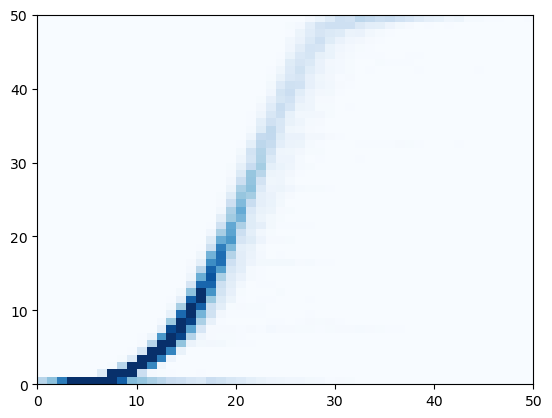

In [6]:
num_bins = 50
data = read_data('../江苏十分钟数据/D1.csv')
data = data_clean(data)
data = np.asarray(data)
data = data[~np.isnan(data).any(axis=1)]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
print(data)
h, xedges, yedges, _ = plt.hist2d(data[:,2]/(16/num_bins), data[:,3]/(2100/num_bins), bins=num_bins, 
                                    range=[[0,num_bins],[0,num_bins]], cmin=0, cmap='Blues', 
                                    density= True, vmin=0, vmax=0.01)
print(h.shape)

[[4.9860e+01 4.5000e-01 1.7700e+00 0.0000e+00]
 [4.9860e+01 4.3000e-01 1.7600e+00 0.0000e+00]
 [4.9860e+01 3.7000e-01 1.6800e+00 0.0000e+00]
 ...
 [2.3000e+01 7.5400e+00 5.1900e+00 3.8906e+02]
 [0.0000e+00 1.1360e+01 5.2600e+00 6.6052e+02]
 [0.0000e+00 1.2150e+01 5.7700e+00 8.0464e+02]]


/tmp/ipykernel_128/1677268569.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  full_perid = pd.date_range(start='20200101', end='20210101',freq='10min', closed='left')


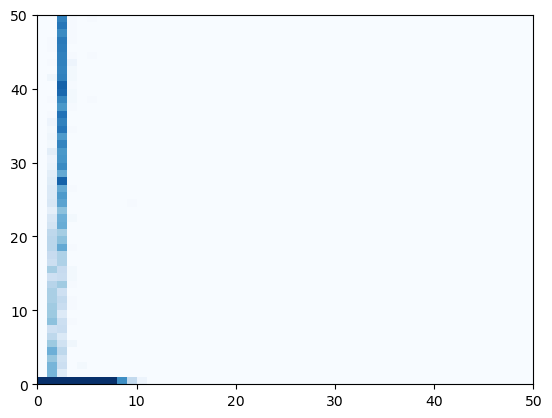

In [7]:
num_bins = 50
data = read_data('../江苏十分钟数据/D1.csv')
data = data_clean(data)
data = np.asarray(data)
data = data[~np.isnan(data).any(axis=1)]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
print(data)
h, xedges, yedges, _ = plt.hist2d(data[:,2], data[:,3], bins=num_bins, 
                                    range=[[0,num_bins],[0,num_bins]], cmin=0, cmap='Blues', 
                                    density= True, vmin=0, vmax=0.01)
# print(h.shape)
# plt.imshow(h)

In [7]:
data[:,2]/(16/num_bins)

array([ 5.53125,  5.5    ,  5.25   , ..., 16.21875, 16.4375 , 18.03125])

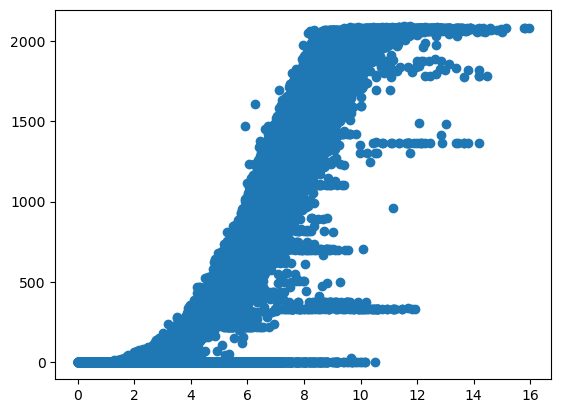

In [8]:
plt.scatter(data[:,2], data[:, 3])

In [16]:
h[0]

array([0.0029469, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       ])

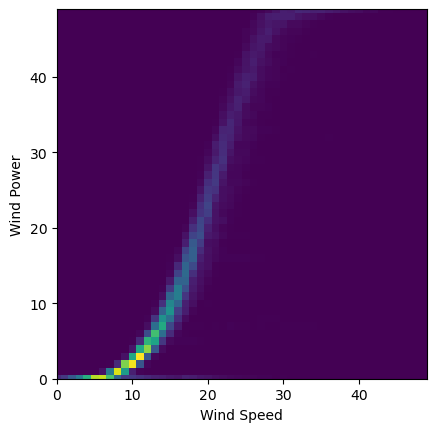

In [45]:
plt.xlabel("Wind Speed")
plt.ylabel("Wind Power")
plt.ylim(0,49)
plt.xlim(0,49)
# plt.xticks([])
# plt.yticks([])
plt.imshow(h.T)

In [17]:
plt.imshow?

In [7]:
def load_record(path):
    with open(path, 'rb') as f:
        return pickle.load(f)


In [8]:
data = load_record(f'record/99999.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'record/99999.pkl'

In [9]:

# 提取每台风机的风功率曲线概率分布
h_all = []
h_1D_all=[]
num_bins = 50
num = 24
norm_hist = True
for ID in range (1,num+1):
    print('the ID of wind turbine:', ID)
    test_data = read_data('D:/research/windpower/windpower/windpower/Data/D%d'%(ID) + '.csv')
    test_data = data_clean(test_data)
    data_array = np.array(test_data)
    data_array = data_array[~np.isnan(data_array).any(axis=1)] 
    
    # 由于hist2d无法调整colorbar范围，所以hist2d只用于计算h，进而用于绘图和KL散度
    plt.figure('hist_%d'%ID)
    if norm_hist == True:
        h, xedges, yedges, _ = plt.hist2d(data_array[:,2]/(16/num_bins), data_array[:,3]/(2100/num_bins), bins=num_bins, 
                                          range=[[0,num_bins],[0,num_bins]], cmin=0, cmap='Blues', 
                                          density= True, vmin=0, vmax=0.01)         
    else:
        h, xedges, yedges, _ = plt.hist2d(data_array[:,2], data_array[:,3], bins=num_bins, 
                                          range=[[0,16],[0,2100]], cmin=0, cmap='Blues', 
                                          density= True, vmin=0, vmax=0.01/(16/num_bins)/(2100/num_bins))# vmax按照此方法计算后norm_hist为T或F对应的图的内容完全一样。用F的图和T的color bar组合，可以让xy轴为真实值，同时图中颜色对应的是与class width无关的概率。         
    # density意味着是normalize histogram。
    # The normalized count is the count in the class divided by the number of observations times the class width （16/50 and 2100/50）.
    # For this normalization, the area (or integral) under the histogram is equal to one. 
    # From a probabilistic point of view, this normalization results in a relative histogram that is most akin to the probability density function
    # 为了避免class width影响，将输入部分做归一化/(16/num_bins)和/(2100/num_bins)，将range设为[[0,num_bins],[0,num_bins]]。即可令class width为1。
    # 此时The normalized count is the count in a class divided by the total number of observations. 
    # In this case the relative counts are normalized to sum to one. the number represents the proportion of the data in each class.
    cb = plt.colorbar()
    cb.set_label('Probability density')
    plt.title('Wind turbine %d'%(ID),fontsize=18)
    plt.xlabel('Wind speed (m/s)',fontsize=18) #,fontsize=18
    plt.ylabel('Power (kw)',fontsize=18)
#     plt.savefig('D:/research/windpower/windpower/windpower/figures/probability_density_%d'%(ID)+'.png', dpi=600)
    
    h_all.append(h) # 记录每一步的概率分布
    h_1D = h_all[ID-1].reshape(-1)
    h_1D_all.append(h_1D) # 记录reshape为1D的概率分布
    print ('total density =', np.sum(h_all[ID-1]))

#     绘制风功率曲线
#     plt.figure('Power curve %d'%ID)
#     plt.plot(data_array[:,2], data_array[:,3], '.')
#     plt.xlabel('Wind speed (m/s)',fontsize=18)
#     plt.ylabel('Power (kw)',fontsize=18)
#     plt.title('Wind turbine %d'%(ID),fontsize=18)
#     plt.savefig('D:/research/windpower/windpower/windpower/figures/power_curve_%d'%(ID)+'.png', dpi=600)
    
#     绘制1D的概率分布图
# for ID in [1,6,12,16,24]:
#     plt.figure( figsize=(40,10) )
#     plt.plot(h_1D)


the ID of wind turbine: 1


FileNotFoundError: [Errno 2] No such file or directory: 'D:/research/windpower/windpower/windpower/Data/D1.csv'

test1
[ True False  True False  True False False  True  True  True]
start: 0
i: 2
start: 4
i: 7
start: 8
i: 9
test2
[ True  True False  True False  True False]
start: 1
i: 3


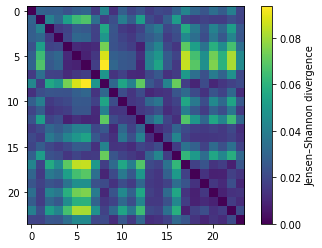

In [16]:
# 计算两两之间JS散度
JS = np.zeros([num,num])
for i in range (1,num+1):
    for j in range (1,num+1):
        JS_ij = distance.jensenshannon(h_1D_all[i-1], h_1D_all[j-1])**2
        JS[i-1,j-1] = JS_ij 
plt.figure('JS divergence')
plt.imshow(JS)
plt.colorbar() .set_label('Jensen–Shannon divergence')
# plt.savefig('D:/research/windpower/windpower/windpower/figures/JS_divergence.png', dpi=600)


# 第一个batch包含风机1所有数据
# 第一个batch统一预测功率
# 第一个batch预测值与真值统计MSE
# 第一个batch预测值统计概率密度，真值统计概率密度
# 第一个batch预测值与真值统计JS散度
# MSE+JS为loss
# 梯度回传
# 进入第二个batch（第二个风机）


# for ID in range (1,2):
#     print('the ID of wind turbine:', ID)
#     test_data = read_data('D:/research/windpower/windpower/windpower/Data/D%d'%(ID) + '.csv')
#     test_data = data_clean(test_data)
#     test = test_data.isnull().any(axis=1).values
#     nan_pos = np.r_[True, np.diff(test)]

    


In [6]:
# 产生训练数据
def nan_seg(df):
    # 标记Nan，并以此为边界将数据拆分
    # return data segmentation seplit by continuous nan value
    # data for checking nan value
    # arr = df[column_name].values
    # get value position where nan appear
    # thre first element must be True so add True before the result
    # Select all rows with NaN under the entire DataFrame
    arr = df.isnull().any(axis=1).values # 标记每行（axis=1）是否含有Nan，有的话则为True
    arr = np.r_[arr, True] # 相当于在末尾增加一个一定含有Nan的行。这样可以保证后续循环中能够找到所有不含有Nan的数据。（如果序列结尾没有nan，则后续代码会忽略掉最后一段不含有nan的数据。换句话说，缺少转变点，无法提取有效的终止点。）
    # and state change point
    nan_pos = np.r_[True, np.diff(arr)] # np.diff处理布尔值时，实际是在标记有无T和F之间的转换。e.g.np.diff([True, False, True, True, False, False])结果为[ True  True False  True False]
    start = 0
    for i, flag in enumerate(nan_pos):
        if flag and i>0: # 如果出现了转变，以转变点为序列数据的起始/终止点
            if not arr[start]: # 如果起始位置对应F，也就是不含Nan，则后续数据是要记录的
                yield df.iloc[start:i] # 输出起始位置到转变处之间的结果
            start = i # 当前终止点成为下一段的起始点
# 实验算例
# print('test1')   
# arr = [ False,  False, True, True, False, False, False, True, False, True]
# nan_pos = np.r_[True, np.diff(arr)]
# start = 0
# for i, flag in enumerate(nan_pos):
#     if flag and i>0:
#         if not arr[start]: # 如果不是含有Nan的
#             print('start:',start)
#             print('i:',i)            
#         start = i

# print('test2')
# arr = [ True, False,  False, True, True, False, False]
# nan_pos = np.r_[True, np.diff(arr)]
# start = 0
# for i, flag in enumerate(nan_pos):
#     if flag and i>0:
#         if not arr[start]: # 如果不是含有Nan的
#             print('start:',start)
#             print('i:',i)            
#         start = i

def data_sampler(df, window_size):
    i = 0
    while i+window_size - 1 < len(df):
        yield df[i:i+window_size]
        i += 6 #每次错位1h
        
class SeqDataset(torch.utils.data.Dataset):
    window_size = 6*24*4
    dtype = torch.float32
    
    def __init__(self, root_dir, transform=None):
        self.file_list = [i for i in os.listdir(root_dir) if i.endswith('.csv')]
        self.file_list.remove('D25.csv')
        self.root_dir = root_dir
        self.__init_dataset()
    
    def __init_dataset(self):
        self.samples = []
        mean, std = self.__dataset_normalizeation()
        for data in self.__data_loader(): 
            for data_seg in nan_seg(data): # 将data中的数据根据Nan位置拆分开
                if len(data_seg) > self.window_size: 
                    for sample in data_sampler(data_seg, self.window_size): # 对data_seg中的内容按照window_size拆分
                        sample = torch.as_tensor(sample.values, dtype=self.dtype)
                        sample.sub_(mean).div_(std) # 用统一的mean和std进行标准化
                        self.samples.append((sample[:, :-1], sample[:, -1:])) # 生成LSTM所需的序列数据

    def __dataset_normalizeation(self):
        # 对所有风机的数据统一求mean和std
        whole_data = []
        for data in self.__data_loader():
            whole_data.append(data)            
        whole_data = pd.concat(whole_data, axis=0, ignore_index=True) # 把所有的__data_loader的数据进行拼接        
        mean = torch.as_tensor(whole_data.mean(), dtype=self.dtype)
        std = torch.as_tensor(whole_data.std(), dtype=self.dtype)
        
        return mean, std
            
        
    def __data_loader(self):
        for data_file in self.file_list:
            file_path = os.path.join(self.root_dir, data_file)
            data = read_data(file_path)
            data = data_clean(data)
            yield data
                             
    def __getitem__(self, index):
        return self.samples[index]
    
    def __len__(self):
        return len(self.samples)


In [8]:
model = NETLSTM(dim_in=3, dim_hidden=2, dim_out=1, num_layer=2, dropout=0.3)
model.to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

training_dataset = SeqDataset('D:/research/大唐风电/大唐风电/大唐风电/Data')
print (training_dataset)
dataloader = DataLoader(training_dataset, shuffle=True, batch_size=1000, drop_last=True)

In [14]:
for i, (input_, target) in enumerate(dataloader):
    print (i)
    print(np.shape(input_))


0
torch.Size([1000, 10, 3])
1
torch.Size([1000, 10, 3])
2
torch.Size([1000, 10, 3])
3
torch.Size([1000, 10, 3])
4
torch.Size([1000, 10, 3])
5
torch.Size([1000, 10, 3])
6
torch.Size([1000, 10, 3])
7
torch.Size([1000, 10, 3])
8
torch.Size([1000, 10, 3])
9
torch.Size([1000, 10, 3])
10
torch.Size([1000, 10, 3])
11
torch.Size([1000, 10, 3])
12
torch.Size([1000, 10, 3])
13
torch.Size([1000, 10, 3])
14
torch.Size([1000, 10, 3])
15
torch.Size([1000, 10, 3])
16
torch.Size([1000, 10, 3])
17
torch.Size([1000, 10, 3])
18
torch.Size([1000, 10, 3])
19
torch.Size([1000, 10, 3])
20
torch.Size([1000, 10, 3])
21
torch.Size([1000, 10, 3])
22
torch.Size([1000, 10, 3])
23
torch.Size([1000, 10, 3])
24
torch.Size([1000, 10, 3])
25
torch.Size([1000, 10, 3])
26
torch.Size([1000, 10, 3])
27
torch.Size([1000, 10, 3])
28
torch.Size([1000, 10, 3])
29
torch.Size([1000, 10, 3])
30
torch.Size([1000, 10, 3])
31
torch.Size([1000, 10, 3])
32
torch.Size([1000, 10, 3])
33
torch.Size([1000, 10, 3])
34
torch.Size([1000, 10,

the ID of wind turbine: 1


/tmp/ipykernel_128/1677268569.py:5: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  full_perid = pd.date_range(start='20200101', end='20210101',freq='10min', closed='left')


tensor(1.0000)
tensor(-9.0399e+09)


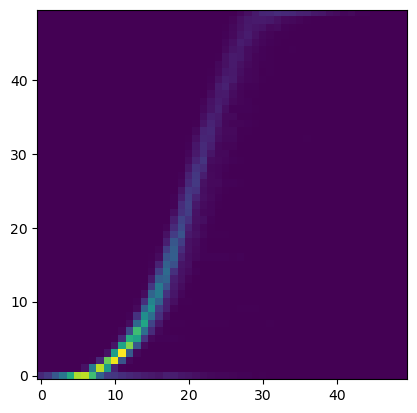

In [9]:
import torchist
from torchist.metrics import kl_divergence
import torch
Tensor = torch.tensor

def power_curve(data, bins=50):
    if not torch.is_tensor(data):
        data = torch.from_numpy(data)
        data.to(DEVICE)
    pc = torchist.histogramdd(data, bins=bins)/len(data)
    return pc

def kl_div(p, q):
    return torch.nn.functional.kl_div(p, q, reduction='sum')

def js_div(p: Tensor, q: Tensor) -> Tensor:
    r"""Computes the Jensen-Shannon divergence between two distributions.
    Args:
        p: A dense or sparse histogram, (*,).
        q: A dense or sparse histogram, (*,).
        gamma: The mixing rate.
        `**kwargs` are passed on to `kl_divergence`.
    Returns:
        The divergence, (,).
    """
    m = 0.5 * (p + q)
    js = 0.5 * (kl_div(p, m) + kl_div(q, m))
    return js


# 提取每台风机的风功率曲线概率分布
h_all = []
h_1D_all=[]
num_bins = 50
num = 24
norm_hist = True
ID = 1
print('the ID of wind turbine:', ID)
test_data = read_data('../江苏十分钟数据/D%d'%(ID) + '.csv')
test_data = data_clean(test_data)
data_array = np.array(test_data, dtype=np.float32)
data_array = data_array[~np.isnan(data_array).any(axis=1)] 
h = power_curve(data_array[:, [3,2]])
plt.imshow(h, origin='lower')
print(h.sum())
print(js_div(torch.from_numpy(data_array[:, 2]), torch.from_numpy(data_array[:, 3])))
    #print(js_divergence(torch.from_numpy(data_array[:, 2]), torch.from_numpy(data_array[:, 3])))

In [19]:
h.shape

torch.Size([50, 50])

In [10]:
x = data_array[: ,2]

y = data_array[:, 3]
print(x, y)

[1.77 1.76 1.68 ... 5.19 5.26 5.77] [  0.     0.     0.   ... 389.06 660.52 804.64]


In [11]:
x = torch.from_numpy(x)

In [12]:
y = torch.from_numpy(y)

In [13]:
x.reshape(-1, 1).shape

torch.Size([49883, 1])

In [14]:
diff_x = torch.pow(abs(x.reshape(-1, 1) - torch.unsqueeze(torch.Tensor(
    np.linspace(0, 16, num=50)), dim=0)), -1)
print(diff_x.shape)

torch.Size([49883, 50])


In [15]:
diff_y = torch.pow(abs(y.reshape(-1, 1) - torch.unsqueeze(torch.Tensor(
    np.linspace(0, 2100, num=50)), dim=0)), -1)
print(diff_x.shape)

torch.Size([49883, 50])


In [16]:
h = torch.mm(diff_x.t(), diff_y)
print(h.shape)

torch.Size([50, 50])


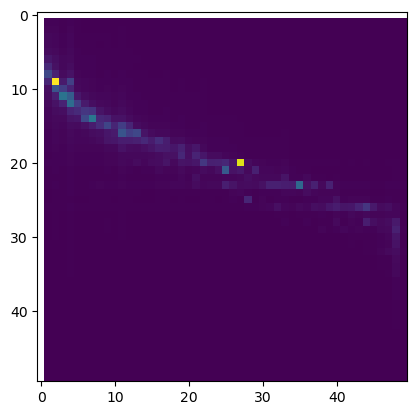

In [17]:
plt.imshow(h)

In [47]:
x2 = torch.pow(diff_x, 2)

In [48]:
y2 = torch.pow(diff_y, 2)

In [49]:
h2 = torch.mm(x2.t(), y2)

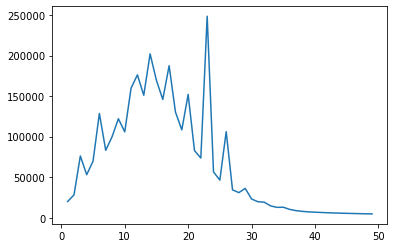

In [65]:
plt.plot(diff_x.sum(dim=0))

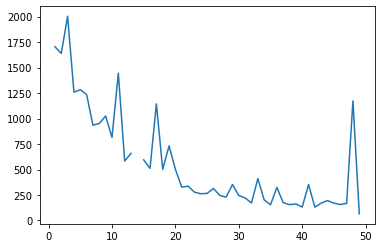

In [64]:
plt.plot(diff_y.sum(dim=0))

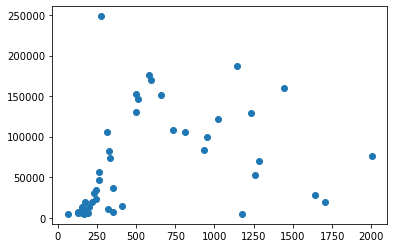

In [63]:
plt.scatter(diff_y.sum(dim=0), diff_x.sum(dim=0))